# Milestone 1: Consumer Intent
#### Joshua Greenert
#### DSC550-T301 Data Mining
#### 10/8/2022

In [1]:
# What is the best time to advertise to online customers?
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_consumer = pd.read_csv('online_shoppers_intention.csv')
df_consumer.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


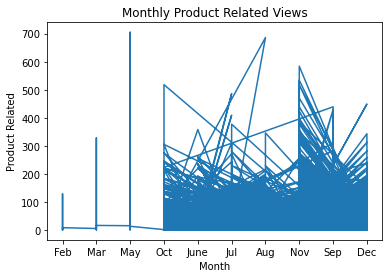

In [2]:
# Create a graph to visualize product views by month.
plt.title('Monthly Product Related Views')
plt.xlabel('Month')
plt.ylabel('Product Related')
plt.plot(df_consumer.Month, df_consumer.ProductRelated)
plt.show()


According to the information shown, there appears to be missing data within the months of Feb, Mar, and May while January and April are completely missing from the dataset.  However, based on the data we can glean from the plot, we can see that there are far more product related page views in November and December which makes sense due to the holidays.

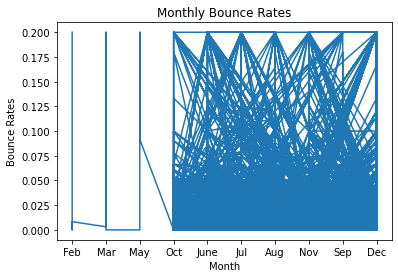

In [3]:
# Create a graph to visualize product views by month.
plt.title('Monthly Bounce Rates')
plt.xlabel('Month')
plt.ylabel('Bounce Rates')
plt.plot(df_consumer.Month, df_consumer.BounceRates)
plt.show()

Once again, the data appears to be missing for the months of February, March, and May.  When reviewing this data for future information, it may be wise to either fill those values in to match other months or remove those months from the dataset altogether.

 Revenue on Weekends: 499
 Revenue on Weekdays: 1409
 Weekends with No Revenue: 2369
 Weekdays with No Revenue: 8053


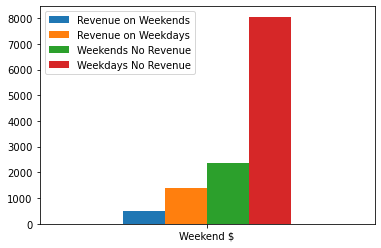

In [4]:
# Convert all boolean values to 0 and 1s.
df_consumer["Weekend"] = df_consumer["Weekend"].astype(int)
df_consumer["Revenue"] = df_consumer["Revenue"].astype(int)

# Determine the weekend amounts where revenue is true.
weekendRevenueCount = 0
nonweekendRevenueCount = 0
noSalesOnWeekend = 0
noSalesOnWeekday = 0

# Loop through all objects and collect the counts to compares whether weekends do better than week days.
for index, row in df_consumer.iterrows():
    if(row['Weekend'] and row['Revenue']):
        weekendRevenueCount = weekendRevenueCount + 1
    elif(row['Weekend'] == False and row['Revenue']):
        nonweekendRevenueCount = nonweekendRevenueCount + 1
    elif(row['Weekend'] and row['Revenue'] == False):
        noSalesOnWeekend = noSalesOnWeekend + 1
    else:
        noSalesOnWeekday = noSalesOnWeekday +1

# Print the results of the loop.
print(f" Revenue on Weekends: {weekendRevenueCount}\n \
Revenue on Weekdays: {nonweekendRevenueCount}\n \
Weekends with No Revenue: {noSalesOnWeekend}\n \
Weekdays with No Revenue: {noSalesOnWeekday}")

# Create a new dataframe with values.
df_weekend_calculations = pd.DataFrame({'Revenue on Weekends': weekendRevenueCount, \
                                        'Revenue on Weekdays': nonweekendRevenueCount, \
                                       'Weekends No Revenue': noSalesOnWeekend, \
                                       'Weekdays No Revenue': noSalesOnWeekday}, index = ["Weekend $"])

# Display the new bar graph to show non sales with days with sales
ax = df_weekend_calculations.plot.bar( rot=0)

When coming into the assessment, my assumption was that the weekends would have the most online sales.  However, according to the data, the most online sales take place during the weekdays by almost three times the amount!  This data may suggest that companies should focus their advertisement campaigns on the weekdays more than the weekends since there are more sales that happen on those days; alternatively, there are only two days in the weekend where there are five days in the week.  If the weekends suggest such a high percentage of that week for sales, it may prove the opposite.

This data shows some outliers while seeming to indicate that holidays aren't valuable for online product sales. 
Let's dig deeper to make sure.

Revenue On Holiday: 10
Revenue Near Holiday: 67
Revenue Not Near/On Holiday: 1831


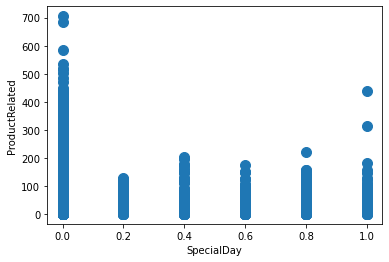

In [5]:
# Create a graph to visualize special days (holidays) with product-related page views.
df_consumer.plot.scatter(x = 'SpecialDay', y = 'ProductRelated', s = 100);
print("This data shows some outliers while seeming to indicate that holidays aren't valuable for online product sales. \n\
Let's dig deeper to make sure.\n")

# Calculate the amounts for the revenue bought on days not equal to zero to compare with ones that were.
revenueNotNearHoliday = 0
revenueNearHoliday = 0
revenueOnHoliday = 0
for index, row in df_consumer.iterrows():
    if(row['Revenue'] and row['SpecialDay'] == 0):
        revenueNotNearHoliday = revenueNotNearHoliday + 1
    elif(row['Revenue'] and row['SpecialDay'] == 1):
        revenueOnHoliday = revenueOnHoliday + 1
    elif(row['Revenue'] and row['SpecialDay'] != 1 and row['SpecialDay'] != 0):
        revenueNearHoliday = revenueNearHoliday + 1
        
# Print the results to see them visually.        
print(f"Revenue On Holiday: {revenueOnHoliday}\n\
Revenue Near Holiday: {revenueNearHoliday}\n\
Revenue Not Near/On Holiday: {revenueNotNearHoliday}")

According to the data provided, online purchases are not entirely significant, but they aren't entirely insignificant
either.  If 4% of total online sales come from holidays, or days near the holiday, then it would make sense to advertise
during special days throughout the year to maximize the amount that a company can make from their consumers.

## Conclusion

Based on the graphs and data recorded above, there are quite a few takeaways from this exploratory data analysis.  First, the assumption that weekends would have the most sales — instead of weekdays — is notable false.  If the weekends count for two days and weekdays count for five days, then the weekdays account for thirty-two more sales per week than the weekends.  Second, the days that people are ordering products online appears to be less focused than initially assumed.  With the graphs on product searches compared with the special days calculations, we can see that holidays do bring a bit more attention to products, but don't always reach the goal of a conversion.  Finally, since the dataset lacks information for three months of data, it may be difficult to surmise a conclusion regarding any particular month.  Moving forward, the month column may need to be stripped from the dataset along with other miscellaneous columns that don't provide information succintly. 

# Milestone 2: Data Preparation
#### Joshua Greenert
#### DSC550-T301 Data Mining
#### 10/22/2022

In [6]:
# Round the numbers of product related duration to be 2 spots in decimals.
df_consumer['ProductRelated_Duration'] = df_consumer['ProductRelated_Duration'].round(decimals = 2)

The product related duration column has data that could be useful to determine how much time the average user spends on a page before making a purchase.  This could assist is understanding more about the timing related to the overall sale for businesses, and how this may impact their servers when multiple users are browsing through.

In [7]:
# Get dummies for the months to use continous variables instead of catagorical.
df_consumer_new = pd.get_dummies(df_consumer, columns = ['Month'])

The month is currently set up as a categorical variable and indicates what month the user visited during.  This can be updated to a dummy number to use in later machine learning to better isolate the month to which sales are best suited for.  Likewise, the month may give insight to business owners as to when to start the marketting campaigns, or paid marketting campaigns need to be ended.  In either case, this feature may prove critical to the overall objective of the EDA.

In [8]:
# Get dummies for the VisitorType columns to use continous variables instead of catagorical.
df_consumer_final = pd.get_dummies(df_consumer_new, columns = ['VisitorType'])

As the final item to update for the data preparation step, we need to convert the visitorType field to be a set of dummies for the future machine learning process.  In future steps, this will assist to determine if this feature is valuable or not when at the stage of setting up the feature selection.  Understanding, though, that this feature may not be valuable since it may not be relevant since some users tend to purchase products from websites for the first time, and never return.

In [9]:
# Remove the aministrative columns
df_consumer_final = df_consumer_final.drop(['Administrative'],axis=1)
df_consumer_final = df_consumer_final.drop(['Administrative_Duration'],axis=1)

The administrative and administrative duration columns aren't going to assist in understanding consumer actions, nor will they assist in understanding the target revenue.  These columns can be removed since admin user information isn't essential to future feature selection.

In [11]:
# Display the prepared dataframe.
df_consumer_final.head(5)

Index(['Informational', 'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'Weekend', 'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

# Milestone 3: Model Building and Evaluation
#### Joshua Greenert
#### DSC550-T301 Data Mining
#### 11/1/2022

## Step 1: Split Train and Test Data

In [12]:
# Split the data to train and test data, then set up the targets and features.
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_consumer_final)

# Set the target as revenue.
target_test = test.Revenue
features_test = test.drop(['Revenue'],axis=1).values

# Set the ones for train set.
target_train = train.Revenue
features_train = train.drop(['Revenue'],axis=1).values

## Step 2a: Hyperparameter Tuning

In [18]:
# Use hyperparameter tuning to attempt to find the best classifier to use.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Set the k nearest neighbors and the pipe.
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)
pipe = Pipeline([('scaler', MinMaxScaler()),('classifier', knn)])
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Create a search space.
search_space = [{'classifier': [log_model],
                "classifier__penalty": [ 'l2'],
                "classifier__C": np.logspace(0, 4, 10)},
               {"classifier": [RandomForestClassifier()],
               "classifier__n_estimators": [10, 100, 1000],
               "classifier__max_features": [1, 2, 3]}]

# Create a grid search classifier.
classifier = GridSearchCV(pipe, search_space, scoring='accuracy', cv = 5, verbose = 0)

In [19]:
# Fit the features and target to the classifier.
best_model = classifier.fit(features_train, target_train)
best_model.best_estimator_.get_params()["classifier"]

RandomForestClassifier(max_features=3, n_estimators=1000)

## Step 2b: Hyperparameter Tuning Continued

In [20]:
# The result of the last test determined that the random forest classifier was best estimator.  Need more tests...
# Add in additional libraries.
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Initialze the estimators
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)
clf6 = MultinomialNB()
clf7 = GradientBoostingClassifier(random_state=42)

# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [clf2]

param4 = {}
param4['classifier__max_depth'] = [5,10,25,None]
param4['classifier__min_samples_split'] = [2,5,10]
param4['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param4['classifier'] = [clf4]

param6 = {}
param6['classifier__alpha'] = [10**0, 10**1, 10**2]
param6['classifier'] = [clf6]

param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 250]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [clf7]

# Fit a new pipeline for the testing of other classifiers.
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param4, param6, param7]

In [21]:
# Fit the classifiers into the grid search.
grid_search_fit = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='roc_auc').fit(features_train, target_train)

In [22]:
# Show the best parameters.
grid_search_fit.best_params_

{'classifier': GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=42),
 'classifier__max_depth': 5,
 'classifier__n_estimators': 50}

In [23]:
# Show the best score.
grid_search_fit.best_score_

0.9276985902779611

## Step 3: Feature Selection

In [26]:
# Use the chi squared to find the top 3 best features.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_selector = SelectKBest(chi2, k = 3)
features_kbest = chi2_selector.fit_transform(features_train, target_train)

# Show the results.
print(f"Original number of features: {features_train.shape[1]}")
print(f"Reduced number of features: {features_kbest.shape[1]}")

Original number of features: 26
Reduced number of features: 3


In [27]:
# Set the feature filter, set the feature names.
cols = chi2_selector.get_support(indices = True)
features_names = df_consumer_final.columns[cols]

print(features_names)

Index(['Informational_Duration', 'ProductRelated_Duration', 'PageValues'], dtype='object')


In [30]:
# Create a decision tree to review the chi and create another model to test the training data.
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Create the classifier.
decision_tree = DecisionTreeClassifier()

# Fit a decision tree classifier on the training set.
model_kbest = decision_tree.fit(features_kbest, target_train)

# Report the accuracy and create a confusion matrix for the model prediction on the test set.
predictions_kbest = model_kbest.predict(features_kbest)

# Create the score from the predictions.
score_kbest = accuracy_score(target_train,predictions_kbest)

confusion_matrix_kbest = metrics.confusion_matrix(target_train, predictions_kbest)

# Show the accuracy.
print(f"Accuracy Score: {score_kbest}")
print(confusion_matrix_kbest)

Accuracy Score: 0.9951335568292419
[[7829    0]
 [  45 1373]]


In [34]:
# Use selected model and confirm conclusion with test data.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 

# Create function for MAE
def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

gradient_classifier = GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=42)
model = gradient_classifier.fit(features_test, target_test)

# Calculate the values for test data.
target_probabilities = model.predict(features_test)

# Get the results from the test data metrics
print("Test data")
print(f"R2: {gradient_classifier.score(features_test, target_test)}")
print(f"RMSE: {mean_squared_error(target_test, target_probabilities, squared = False)}")
print(f"MAE: {mae(target_test, target_probabilities)}")

Test data
R2: 0.9604281543950698
RMSE: 0.19892673426397534
MAE: 0.03957184560493026


In [37]:
# Repeat the chi selector again with the test data to determine if the numbers get more accurate.
chi2_selector = SelectKBest(chi2, k = 3)
features_kbest = chi2_selector.fit_transform(features_test, target_test)

gradient_classifier = GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=42)
model = gradient_classifier.fit(features_kbest, target_test)

# Calculate the values for test data.
target_probabilities = model.predict(features_kbest)

# Get the results from the test data metrics
print("Test data")
print(f"R2: {gradient_classifier.score(features_kbest, target_test)}")
print(f"RMSE: {mean_squared_error(target_test, target_probabilities, squared = False)}")
print(f"MAE: {mae(target_test, target_probabilities)}")

Test data
R2: 0.9471294193966915
RMSE: 0.22993603589543868
MAE: 0.052870580603308466


## Conclusion

After running tests against the training data to determine the appropriate model, the initial winner was the random forest classifier; this made sense when comparing it with the logistic regression model.  Additional tests against this model with alternatives provided a new winner as the gradient boosting classifier. After analyzing the training data for feature selection, the top three (per chi-squared) were determined as 'Informational_Duration', 'ProductRelated_Duration', and 'PageValues'.  Using the test data with the selected model, the results confirm an R2 (Coefficient of Determination) value of 96.04, an RMSE (Root Mean Squared Error) of 19.89, and a MAE (Mean Absolute Error) of 0.03.  When reattempting this process with the reduced three features, the scores provided move further away from the target very slightly.  Therefore, it's likely that our first set of features provide minor insights into our dataset; whereas, the three features selected provide the most insight for testing the model.